<a href="https://colab.research.google.com/github/jangvu/Project_by_me/blob/main/LSTM_NFLX_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Data"

NFLX.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator


In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/Data/NFLX.csv')

In [ ]:
print(raw_data.shape)
raw_data.head(5)
raw_data.info()

(1531, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1531 non-null   object 
 1   Open       1531 non-null   float64
 2   High       1531 non-null   float64
 3   Low        1531 non-null   float64
 4   Close      1531 non-null   float64
 5   Adj Close  1531 non-null   float64
 6   Volume     1531 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 83.9+ KB


In [ ]:
train_data, test_data = raw_data[:1224]['Open'].values.reshape(-1), raw_data[1224:]['Open'].values.reshape(-1)
train_date, test_date = raw_data[:1224]['Date'].values.reshape(-1), raw_data[1224:]['Date'].values.reshape(-1)

**Plotting Data**

In [ ]:
x = []
for i in range(1224,1224 + 307):
  x.append(i)
print(len(x))
len(raw_data)
len(test_data)

307


307

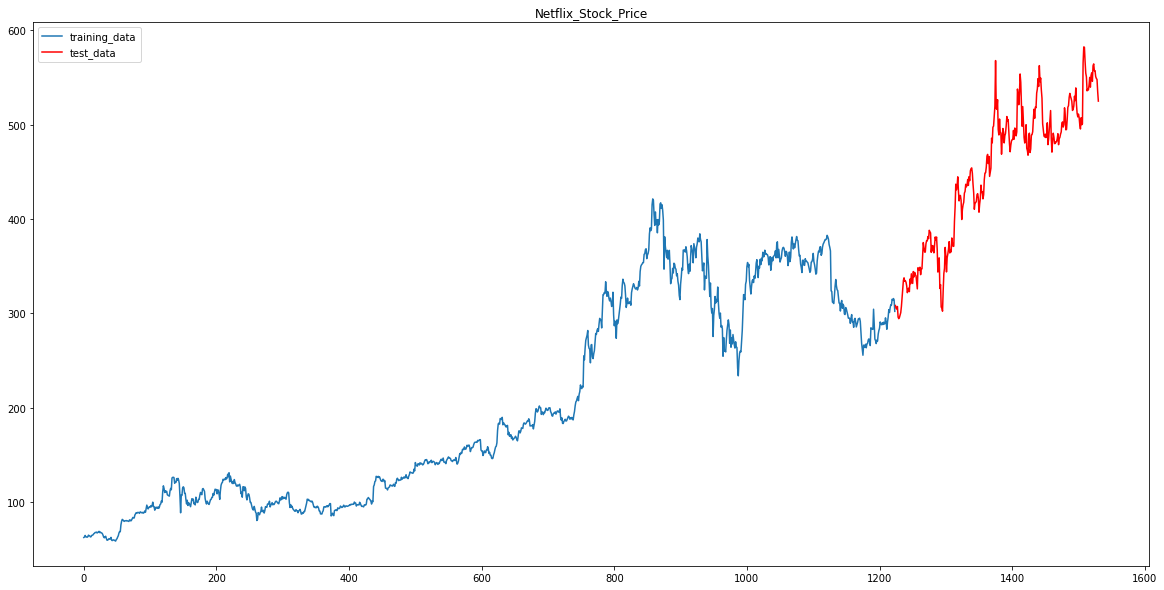

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_data, label ='training_data')
plt.plot(x,test_data.reshape(-1), color = 'red', label = 'test_data')
plt.legend()
plt.title('Netflix_Stock_Price')
plt.show()

In [ ]:
train_data

array([ 62.57143 ,  63.087143,  64.741432, ..., 315.779999, 314.390015,
       302.220001])

**We want to predict tomorrow opening price**
Firstly, We try with only opening price

Creating a sliding window

In [ ]:
def getdata(data, window_size, shift):
  X_data = []
  y_data = []
  for i in range(len(data) - window_size - shift):
    X_data.append(data[i:window_size + i])
    y_data.append(data[i+window_size:i+window_size+shift])
  return np.asarray(X_data), np.asarray(y_data)

In [ ]:
X_train, y_train = getdata(train_data,10,1)
X_test, y_test = getdata(test_data,10,1)

Recognizing the data in different scale -> Scaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = X_train.reshape(-1,10)

X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)

X_test = X_test.reshape(-1,10)

X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)

X_train = X_train.reshape(-1,10,1)
y_train = y_train.reshape(-1,1)

X_test = X_test.reshape(-1,10,1)
y_test = y_test.reshape(-1,1)

Building Model

In [ ]:
model_LSTM_Open = keras.models.Sequential([
                                           keras.layers.LSTM(50,activation='relu',input_shape=[10,1],return_sequences=True),
                                           keras.layers.Dropout(0.2),
                                           keras.layers.LSTM(50,return_sequences=True),
                                           keras.layers.Dropout(0.2),
                                           keras.layers.LSTM(50),
                                           keras.layers.Dropout(0.2),
                                           keras.layers.Dense(1)
]
)

In [ ]:
model_LSTM_Open.compile(optimizer='adam', loss ='mse')

In [ ]:
model_LSTM_Open.fit(X_train,y_train,validation_split=0.2,epochs=500, batch_size=10)

Epoch 1/500
97/97 [==============================] - 3s 12ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 2/500
97/97 [==============================] - 1s 12ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 3/500
97/97 [==============================] - 1s 12ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 4/500
97/97 [==============================] - 1s 12ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 5/500
97/97 [==============================] - 1s 12ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/500
97/97 [==============================] - 1s 12ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 7/500
97/97 [==============================] - 1s 12ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 8/500
97/97 [==============================] - 1s 12ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 9/500
97/97 [==============================] - 1s 12ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 10/500
97/97 [==============================] - 1s 12ms/step - loss: 0.0016 - val_loss: 0.0016

In [ ]:
y_pred = model_LSTM_Open.predict(X_test)

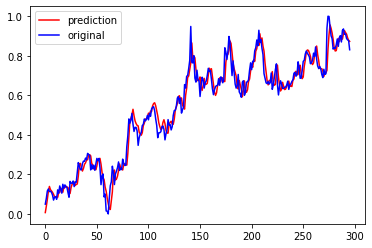

In [ ]:
plt.plot(y_pre, color = 'red', label = 'prediction')
plt.plot(y_test, color = 'blue', label = 'original')
plt.legend()
plt.show()

In [ ]:
train_date

array(['2015-01-26', '2015-01-27', '2015-01-28', ..., '2019-11-29',
       '2019-12-02', '2019-12-03'], dtype=object)

In [ ]:
model_LSTM_Open.evaluate(X_test,y_test)

10/10 [==============================] - 1s 4ms/step - loss: 0.2098


0.36550000309944153

In [ ]:
model_LSTM_Open.save('LSTM_NFLX.H5')

INFO:tensorflow:Assets written to: LSTM_NFLX.H5/assets


INFO:tensorflow:Assets written to: LSTM_NFLX.H5/assets
